In [1]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
import sys
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
py.init_notebook_mode(connected=True)

from pandas import set_option
#from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
# Always good to set a seed for reproducibility
SEED = 7
np.random.seed(SEED)

In [3]:
class RandomSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def RandomSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = RandomizedSearchCV(self.model,
                                 self.hyperparameters,
                                 random_state=1,
                                 n_iter=150,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.RandomSearch()
        pred = best_model.predict(X_test)
        return pred
class GridSearch(object):
    
    def __init__(self,X_train,y_train,model,hyperparameters):
        
        self.X_train = X_train
        self.y_train = y_train
        self.model = model
        self.hyperparameters = hyperparameters
        
    def GridSearch(self):
        # Create randomized search 10-fold cross validation and 100 iterations
        cv = 10
        clf = GridSearchCV(self.model,
                                 self.hyperparameters,
                                 cv=cv,
                                 verbose=0,
                                 n_jobs=-1,
                                 )
        # Fit randomized search
        best_model = clf.fit(self.X_train, self.y_train)
        message = (best_model.best_score_, best_model.best_params_)
        print("Best: %f using %s" % (message))

        return best_model,best_model.best_params_
    
    def BestModelPridict(self,X_test):
        
        best_model,_ = self.GridSearch()
        pred = best_model.predict(X_test)
        return pred

In [3]:
df = pd.read_csv("./Data/usedCleaned2021V.csv")

In [4]:
df_enc = df

In [5]:
df_enc

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,prosek_god_km,Starost
0,BMW,116,2015,194000,Hecbek,Dizel,1.5,115,4.484971,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Plava,Stof,32333.333333,6
1,BMW,116,2015,176000,Hecbek,Dizel,1.5,115,4.486487,Euro 6,Zadnji,Manuelni 6 brzina,Manuelna klima,Crna,Stof,29333.333333,6
2,BMW,116,2015,197000,Hecbek,Dizel,1.5,115,4.474295,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Plava,Stof,32833.333333,6
3,BMW,116,2016,141000,Hecbek,Dizel,1.5,115,4.515568,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,28200.000000,5
4,BMW,116,2015,195000,Hecbek,Dizel,1.5,115,4.499497,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,32500.000000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15757,Opel,Zafira,2003,225000,MiniVan,Dizel,2.0,100,4.077293,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Druga,Stof,12500.000000,18
15758,Opel,Zafira,2003,315234,MiniVan,Dizel,2.0,100,4.069553,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Siva,Stof,17513.000000,18
15759,Opel,Zafira,2004,225000,MiniVan,Dizel,2.0,100,4.118572,Euro 3,Prednji,Manuelni 5 brzina,Automatska klima,Plava,Stof,13235.294118,17
15760,Opel,Zafira,2002,220000,MiniVan,Dizel,2.0,100,4.077293,Euro 3,Prednji,Manuelni 5 brzina,Manuelna klima,Druga,Stof,11578.947368,19


In [6]:
from sklearn.preprocessing import OneHotEncoder

#df_enc = pd.read_csv("./Data/usedCleaned20.csv")
X_t =  df_enc.drop(columns=['Cena', 'Kilometraza', 'Godiste'])
Y_t = df_enc['Cena']

df_enc = pd.get_dummies(df_enc)
X =  df_enc.drop(columns=['Cena', 'Kilometraza', 'Godiste'])
Y = df_enc['Cena']


X_train, X_test, y_train, y_test =train_test_split(X,Y,
                                                   test_size=0.3,
                                                   random_state=0)
X_train_t, X_test_t, y_train_t, y_test_t =train_test_split(X_t,Y_t,
                                                   test_size=0.3,
                                                   random_state=0)

In [7]:
X_train.iloc[0]

Kubikaza                                     2.000000
Snaga motora                               110.000000
prosek_god_km                            14448.846154
Starost                                     13.000000
Marka_Alfa Romeo                             0.000000
                                             ...     
Boja_Siva                                    0.000000
Materijal enterijera_Drugi                   0.000000
Materijal enterijera_Kombinovana koza        0.000000
Materijal enterijera_Prirodna koza           0.000000
Materijal enterijera_Stof                    1.000000
Name: 6303, Length: 143, dtype: float64

In [8]:
X_train_t.iloc[0]

Marka                                           Ford
Model                                          C-Max
Karoserija                                   MiniVan
Gorivo                                         Dizel
Kubikaza                                         2.0
Snaga motora                                     110
EKM                                          Euro 4 
Pogon                                       Prednji 
Menjac                  Automatski / poluautomatski 
Klima                              Automatska klima 
Boja                                            Crna
Materijal enterijera                            Stof
prosek_god_km                           14448.846154
Starost                                           13
Name: 6303, dtype: object

In [28]:
X_train

,Godiste,Kilometraza,Kubikaza,Snaga motora,Marka_Alfa Romeo,Marka_Audi,Marka_BMW,Marka_Citroen,Marka_Fiat,Marka_Ford,...,Pogon_Zadnji,Menjac_Automatski / poluautomatski,Menjac_Manuelni 5 brzina,Menjac_Manuelni 6 brzina,Boja_Bela,Boja_Crna,Boja_Crvena,Boja_Druga,Boja_Plava,Boja_Siva
6978,2010,177300,1.2,60,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5548,2010,225000,1.4,90,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
9074,2017,150000,1.6,135,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
4774,2010,196988,1.7,125,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
3896,2008,191000,2.0,145,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4859,2008,122000,2.0,110,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3264,2011,156000,2.0,140,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
9845,2002,225736,1.9,120,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
10799,2006,180000,2.0,140,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [29]:
## Hyperparameters tuning

In [33]:
# model
model = XGBRegressor()

# A parameter grid for XGBoost
hyperparameters = {
        'gamma':[i/10.0 for i in range(0,4)],
        'n_estimators':range(200,1501,200),
        'max_depth':range(7,16,2),
        'min_child_weight':[4,6,8, 10],
        'subsample':[i/100.0 for i in range(75,100,5)],
        'colsample_bytree':[i/100.0 for i in range(65,90,5)],
        'reg_alpha':[0.05]
        }
print('*'*30)
print('XGBRegressor')
print('*'*30)
XGB_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
Prediction_XGB = XGB_RandSearch.BestModelPridict(X_test)

#{'subsample': 0.8, 'reg_alpha': 0.05, 'min_child_weight': 6, 'max_depth': 11, 'gamma': 0.2, 'colsample_bytree': 0.75} {'subsample': 0.8, 'reg_alpha': 0.05, 'min_child_weight': 6, 'max_depth': 11, 'gamma': 0.2, 'colsample_bytree': 0.75}

******************************
XGBRegressor
******************************
Best: 0.969971 using {'subsample': 0.95, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 7, 'gamma': 0.0, 'colsample_bytree': 0.75}


In [9]:
param = {'subsample': 0.95, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 7, 'gamma': 0.0, 'colsample_bytree': 0.75}
model1 = XGBRegressor(**param)#**param

In [10]:
model1.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.75, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=7,
             min_child_weight=6, missing=nan, monotone_constraints='()',
             n_estimators=400, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0.05, reg_lambda=1, scale_pos_weight=1, subsample=0.95,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
predictions = model1.predict(X_test)
y_test= inv_boxcox(y_test,lam_price)
predictions = inv_boxcox(predictions,lam_price)

In [12]:
print(r2_score(y_test,predictions))
#print(mean_a(y_test_c,p_sl))

0.9548691779815778


In [13]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,predictions))

0.02001551430617088


In [13]:
X_test.shape, y_test.shape

((5520, 175), (5520,))

In [14]:
df_out = X_test_t
df_out['Cena_actual'] = y_test
df_out['Cena_predicted'] = predictions

In [15]:
df_out['MAE'] = abs(df_out['Cena_actual']-df_out['Cena_predicted'])

In [46]:
df_out.nlargest(n=100, columns='MAE')

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera,Cena_actual,Cena_predicted,MAE
6894,Mercedes Benz,C 200,2015,258000,Limuzina,Dizel,1.6,135,Euro 5,Zadnji,Automatski / poluautomatski,Automatska klima,Bela,Stof,18990,11196.031250,7793.968750
5560,Audi,A6,2016,162840,Limuzina,Dizel,2.0,190,Euro 6,Prednji,Automatski / poluautomatski,Automatska klima,Crna,Prirodna koza,13800,19833.337891,6033.337891
17879,BMW,X3,2013,169056,Dzip/SUV,Dizel,2.0,185,Euro 5,4x4,Automatski / poluautomatski,Automatska klima,Plava,Stof,10700,15415.223633,4715.223633
4100,Audi,A3,2015,189402,Limuzina,Dizel,1.6,110,Euro 3,Prednji,Automatski / poluautomatski,Automatska klima,Crna,Stof,13600,9065.493164,4534.506836
3479,BMW,520,2014,157000,Karavan,Dizel,2.0,145,Euro 5,Zadnji,Automatski / poluautomatski,Automatska klima,Bela,Prirodna koza,16500,12060.011719,4439.988281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306,BMW,318,2012,223500,Karavan,Dizel,2.0,145,Euro 5,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Stof,6950,8945.050781,1995.050781
7737,Citroen,C4,2016,203000,Hecbek,Dizel,1.6,90,Euro 6,Prednji,Automatski / poluautomatski,Automatska klima,Bela,Stof,7799,9790.229492,1991.229492
3501,BMW,520,2012,283812,Limuzina,Dizel,2.0,185,Euro 5,Zadnji,Automatski / poluautomatski,Automatska klima,Siva,Stof,12500,14464.788086,1964.788086
3444,BMW,520,2010,205000,Limuzina,Dizel,2.0,185,Euro 4,Zadnji,Manuelni 6 brzina,Automatska klima,Crna,Drugi,10500,12449.388672,1949.388672


In [31]:
df_out['Model'].value_counts()

A4         248
Golf 5     186
Polo       159
320        157
A3         145
          ... 
500L         9
MiTo         9
Ypsilon      9
RAV 4        8
107          8
Name: Model, Length: 118, dtype: int64

In [35]:
df[(df['Model']=='C 200') & (df['Godiste']>2014)]

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga motora,Cena,EKM,Pogon,Menjac,Klima,Boja,Materijal enterijera
6893,Mercedes Benz,C 200,2015,160000,Limuzina,Dizel,1.6,135,16500,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza
6894,Mercedes Benz,C 200,2015,258000,Limuzina,Dizel,1.6,135,18990,Euro 5,Zadnji,Automatski / poluautomatski,Automatska klima,Bela,Stof
6895,Mercedes Benz,C 200,2015,212000,Limuzina,Dizel,1.6,135,18200,Euro 6,Zadnji,Manuelni 6 brzina,Automatska klima,Siva,Prirodna koza
6964,Mercedes Benz,C 200,2015,171000,Karavan,Dizel,2.1,135,12800,Euro 6,Zadnji,Automatski / poluautomatski,Automatska klima,Bela,Prirodna koza


In [42]:
import pickle
with open('ml_model21.pkl', 'wb') as files:
    pickle.dump(model1, files)

In [45]:
# model
model = LGBMRegressor()
hyperparameters = {
    'n_estimators':range(200, 801,200),
    'num_leaves': [60, 80, 120],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50, 70],
    'lambda_l1': [0, 1, 1.5]
    #'lambda_l2': [0, 1]
    }
print('*'*30)
print('LGBMRegressor')
print('*'*30)
LGBM_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
Prediction_LGBM = LGBM_RandSearch.BestModelPridict(X_test)
#params = {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30, 'lambda_l2': 0, 'lambda_l1': 0}

******************************
LGBMRegressor
******************************
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
Best: 0.970873 using {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30, 'lambda_l1': 0}


In [51]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

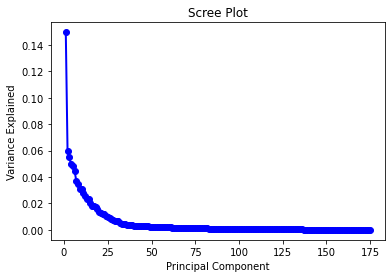

In [52]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

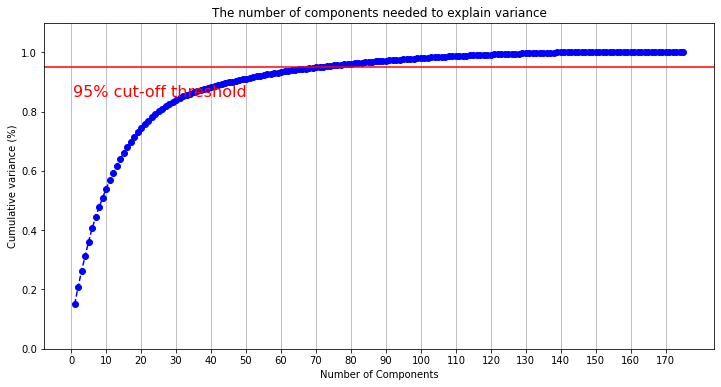

In [58]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 176, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 175, step=10)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [66]:
pca = PCA(n_components=20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [60]:
param = {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30, 'lambda_l1': 0}
model1 = LGBMRegressor(**param)
model1.fit(X_train, y_train)


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0


LGBMRegressor(lambda_l1=0, min_data_in_leaf=30, n_estimators=400, num_leaves=60,
              reg_alpha=0.1)

In [61]:
predictions = model1.predict(X_test)

In [62]:
print(r2_score(y_test,predictions))
#print(mean_a(y_test_c,p_sl))

0.9373907681264841


In [63]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,predictions))

552.0555714360804


In [22]:
import pickle
with open('./models/model_lgb21.pkl', 'wb') as files:
    pickle.dump(model1, files)

In [172]:
# model
model = ExtraTreesRegressor()
hyperparameters = {
    #'criterion': ['mae'],
    'max_depth': [2,8,16],
    'n_estimators': range(50,1500,25),
    'max_features': range(50,401,50),
    'min_samples_leaf': range(20,50,5),
    'min_samples_split': range(15,36,5),
}

print('*'*30)
print('ExtraTreesRegressor')
print('*'*30)
#Extra_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_Extra = Extra_RandSearch.BestModelPridict(X_test)
#{'n_estimators': 850, 'min_samples_split': 20, 'min_samples_leaf': 25, 'max_features': 100, 'max_depth': 16}

******************************
ExtraTreesRegressor
******************************
Best: 0.929340 using {'n_estimators': 850, 'min_samples_split': 20, 'min_samples_leaf': 25, 'max_features': 100, 'max_depth': 16}


In [195]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
hyperparameters = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# model
model = RandomForestRegressor()

print('*'*30)
print('RandomForestRegressor')
print('*'*30)
#RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
#Prediction_Extra = RandSearch.BestModelPridict(X_test)

******************************
RandomForestRegressor
******************************


In [174]:
from sklearn.ensemble import GradientBoostingRegressor


model = GradientBoostingRegressor()

hyperparameters = {
    'n_estimators':range(500, 2001,200),
    'max_depth':range(5,18,2), 
    'min_samples_split':range(100,501,100), 
    'min_samples_leaf':range(30,101,10),
    'max_features':range(16,24,2),
    'subsample':[0.8, 0.85,0.87],
    'learning_rate': [0.001, 0.01, 0.0001]
}


print('*'*30)
print('GradientBoostingRegressor')
print('*'*30)

GB_RandSearch = RandomSearch(X_train,y_train,model,hyperparameters)
Prediction_GB = GB_RandSearch.BestModelPridict(X_test)
#{'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01}

******************************
GradientBoostingRegressor
******************************
Best: 0.962962 using {'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01}


In [23]:
param = {'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01}
model1 = GradientBoostingRegressor(**param)
model1.fit(X_train, y_train)
predictions = model1.predict(X_test)
print(r2_score(y_test,predictions))

0.9642763729526228


In [24]:
print(mean_absolute_error(y_test,predictions))

436.9331491349928


In [54]:
def get_models():
    """Generate a library of base learners."""
    param = {'subsample': 0.95, 'reg_alpha': 0.05, 'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 7, 'gamma': 0.0, 'colsample_bytree': 0.75}
    model1 = XGBRegressor(**param)

    param = {'reg_alpha': 0.1, 'num_leaves': 60, 'n_estimators': 400, 'min_data_in_leaf': 30}
    model2 = LGBMRegressor(**param)
    
    param = {'n_estimators': 850, 'min_samples_split': 20, 'min_samples_leaf': 25, 'max_features': 0.85, 'max_depth': 16}
    model3 = ExtraTreesRegressor(**param)
    

    models = {'XGM':model1, 'LGBM':model2,
              'ETR':model3
              }

    return models

In [55]:

base_learners = get_models()
params = {'subsample': 0.87, 'n_estimators': 1700, 'min_samples_split': 100, 'min_samples_leaf': 40, 'max_features': 22, 'max_depth': 15, 'learning_rate': 0.01, 'random_state':7}
meta_learner = GradientBoostingRegressor(n_estimators=1700,
    max_features=0.7,
    max_depth=13,
    subsample=0.85,
    learning_rate=0.01, 
    random_state=7)

In [56]:
from mlens.ensemble import SuperLearner

# Instantiate the ensemble with 10 folds
sl = SuperLearner(
    folds=10,
    random_state=7,
    verbose=2,
    backend="multiprocessing"
)

# Add the base learners and the meta learner
sl.add(list(base_learners.values())) 
sl.add_meta(meta_learner)

# Train the ensemble
sl.fit(X_train, y_train)

# Predict the test set
p_sl = sl.predict(X_test)

[MLENS] backend: threading



Fitting 2 layers


[MLENS] Found 4 residual cache(s):
        1 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_0_mgr9to
        2 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_7vonrz1p
        3 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_kk8gnu5s
        4 (4096): C:\Users\Pc4y\AppData\Local\Temp\.mlens_tmp_cache_mb0lfo1a
        Total size: 16384
[MLENS] Removing... done.


Processing layer-1             done | 00:02:09
Processing layer-2             done | 00:00:28
Fit complete                        | 00:02:39

Predicting 2 layers
Processing layer-1             done | 00:00:04
Processing layer-2             done | 00:00:01
Predict complete                    | 00:00:06


In [57]:
print(r2_score(y_test,p_sl))

0.9695659416899345


In [58]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,p_sl))

404.5669483408176


In [188]:
import pickle
with open('ml_modelSuper.pkl', 'wb') as files:
    pickle.dump(sl, files)

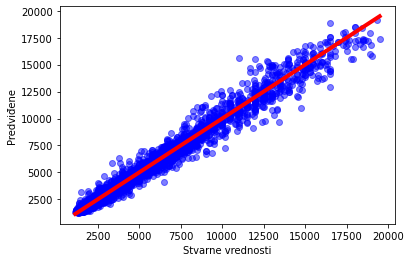

In [62]:
#Plot Real vs Predict
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, color='blue', edgecolors=(0, 0, 1),alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], lw=4,color='Red')
plt.xlabel('Stvarne vrednosti')
plt.xticks(np.arange(1000, 20000, 1000), rotation=60)
plt.yticks(np.arange(1000, 20000, 1000))
plt.ylabel('Predviđene')
plt.show()